<a href="https://colab.research.google.com/github/fotrino/austral/blob/main/H2o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
! pip install -q h2o
! pip install -q pycaret

In [16]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 mins 05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_yw90ko
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.165 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [17]:
from pycaret.datasets import get_data
import numpy as np
df = get_data('bank')

# Separo entre train y test
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
# Convierto los dataframe de pandas a dataframe de H20
train = h2o.H2OFrame(df_train) 
test = h2o.H2OFrame(df_test) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [19]:
train

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [20]:
# Defino cuales columnas son las variables de entrenamiento y cual es el target. 
x = train.columns
y = "deposit"
x.remove(y)
print(x)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [21]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [22]:
# Entreno el modelo
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=60*2)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_2_20210918_142706

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.046053252562327084
RMSE: 0.21460021566234988
LogLoss: 0.15108088734848096
Null degrees of freedom: 10054
Residual degrees of freedom: 10052
Null deviance: 7150.905841622606
Residual deviance: 3038.2366445779517
AIC: 3044.2366445779517
AUC: 0.9663807826575201
AUCPR: 0.7893220399806846
Gini: 0.9327615653150403

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38839237775779534: 


,,no,yes,Error,Rate
0,no,8503.0,402.0,0.0451,(402.0/8905.0)
1,yes,278.0,872.0,0.2417,(278.0/1150.0)
2,Total,8781.0,1274.0,0.0676,(680.0/10055.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.388392,0.719472,177.0
1,max f2,0.175999,0.804116,258.0
2,max f0point5,0.510931,0.742910,133.0
3,max accuracy,0.481180,0.937444,144.0
4,max precision,0.947408,1.000000,0.0
5,max recall,0.017015,1.000000,370.0
6,max specificity,0.947408,1.000000,0.0
7,max absolute_mcc,0.388392,0.682292,177.0
8,max min_per_class_accuracy,0.190560,0.904348,251.0
9,max mean_per_class_accuracy,0.148434,0.910877,272.0



Gains/Lift Table: Avg response rate: 11.44 %, avg score: 11.60 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010045,0.849798,8.656909,8.656909,0.990099,0.888423,0.990099,0.888423,0.086957,0.086957,765.690917,765.690917,0.086844
1,2,0.020090,0.792910,7.704649,8.180779,0.881188,0.819926,0.935644,0.854175,0.077391,0.164348,670.464916,718.077916,0.162888
2,3,0.030035,0.745042,7.694261,8.019680,0.880000,0.767466,0.917219,0.825463,0.076522,0.240870,669.426087,701.968039,0.238062
3,4,0.040080,0.701334,7.444942,7.875639,0.851485,0.723508,0.900744,0.799911,0.074783,0.315652,644.494189,687.563923,0.311160
4,5,0.050025,0.661526,6.994783,7.700519,0.800000,0.682011,0.880716,0.776472,0.069565,0.385217,599.478261,670.051863,0.378480
5,6,0.100050,0.483884,5.527686,6.614102,0.632207,0.571769,0.756461,0.674120,0.276522,0.661739,452.768606,561.410234,0.634226
6,7,0.150075,0.302470,3.163644,5.463950,0.361829,0.391828,0.624917,0.580023,0.158261,0.820000,216.364422,446.394964,0.756440
7,8,0.200000,0.162985,2.020405,4.604348,0.231076,0.227185,0.526604,0.491945,0.100870,0.920870,102.040534,360.434783,0.813963
8,9,0.300050,0.052029,0.643158,3.283514,0.073559,0.095897,0.375539,0.359885,0.064348,0.985217,-35.684156,228.351371,0.773651
9,10,0.400000,0.023347,0.121800,2.493478,0.013930,0.034792,0.285182,0.278652,0.012174,0.997391,-87.820030,149.347826,0.674539




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.06192006401699158
RMSE: 0.24883742487212726
LogLoss: 0.19686341234928473
Null degrees of freedom: 36129
Residual degrees of freedom: 36127
Null deviance: 26074.290121315422
Residual deviance: 14225.350176359314
AIC: 14231.350176359314
AUC: 0.9354489409665714
AUCPR: 0.6274441612675618
Gini: 0.8708978819331428

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2751713238729989: 


,,no,yes,Error,Rate
0,no,29285.0,2620.0,0.0821,(2620.0/31905.0)
1,yes,1056.0,3169.0,0.2499,(1056.0/4225.0)
2,Total,30341.0,5789.0,0.1017,(3676.0/36130.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.275171,0.632914,222.0
1,max f2,0.124717,0.739795,288.0
2,max f0point5,0.440173,0.612225,162.0
3,max accuracy,0.508633,0.909521,138.0
4,max precision,0.971573,1.000000,0.0
5,max recall,0.002948,1.000000,395.0
6,max specificity,0.971573,1.000000,0.0
7,max absolute_mcc,0.275171,0.585145,222.0
8,max min_per_class_accuracy,0.143775,0.866447,278.0
9,max mean_per_class_accuracy,0.088102,0.872549,309.0



Gains/Lift Table: Avg response rate: 11.69 %, avg score: 11.69 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010019,0.843596,7.063238,7.063238,0.825967,0.884641,0.825967,0.884641,0.070769,0.070769,606.323842,606.323842,0.068795
1,2,0.020011,0.779012,6.372155,6.718175,0.745152,0.810211,0.785615,0.847478,0.063669,0.134438,537.215493,571.817460,0.129580
2,3,0.030003,0.731832,5.922077,6.453054,0.692521,0.755851,0.754613,0.816964,0.059172,0.193609,492.207707,545.305356,0.185272
3,4,0.040022,0.686472,5.574998,6.233236,0.651934,0.708598,0.728907,0.789835,0.055858,0.249467,457.499755,523.323594,0.237181
4,5,0.050014,0.650844,4.998233,5.986509,0.584488,0.668411,0.700055,0.765577,0.049941,0.299408,399.823305,498.650874,0.282420
5,6,0.100000,0.473156,4.815534,5.401183,0.563123,0.560537,0.631608,0.663085,0.240710,0.540118,381.553402,440.118343,0.498401
6,7,0.150014,0.304280,3.558778,4.786935,0.416159,0.388145,0.559779,0.571422,0.177988,0.718107,255.877832,378.693509,0.643322
7,8,0.200000,0.177588,2.362784,4.181065,0.276301,0.236256,0.488929,0.487654,0.118107,0.836213,136.278414,318.106509,0.720463
8,9,0.300000,0.058170,1.117160,3.159763,0.130639,0.106193,0.369499,0.360500,0.111716,0.947929,11.715976,215.976331,0.733731
9,10,0.400000,0.025271,0.343195,2.455621,0.040133,0.038558,0.287157,0.280014,0.034320,0.982249,-65.680473,145.562130,0.659352


In [23]:
# Ranking de los modelos entrenados
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_2_20210918_142706,0.935449,0.196863,0.627444,0.16603,0.248837,0.0619201
StackedEnsemble_BestOfFamily_2_AutoML_2_20210918_142706,0.93493,0.197839,0.625116,0.164993,0.24878,0.0618916
GBM_1_AutoML_2_20210918_142706,0.934789,0.198065,0.625722,0.167998,0.249065,0.0620334
XGBoost_1_AutoML_2_20210918_142706,0.928792,0.206316,0.603059,0.174049,0.25444,0.0647397
GBM_3_AutoML_2_20210918_142706,0.91084,0.292455,0.560173,0.190111,0.292204,0.0853832
GLM_1_AutoML_2_20210918_142706,0.90701,0.239988,0.549342,0.216654,0.267014,0.0712963
XGBoost_2_AutoML_2_20210918_142706,0.87753,0.395423,0.537807,0.194761,0.335529,0.11258
GBM_4_AutoML_2_20210918_142706,0.866436,0.320118,0.478454,0.231043,0.305133,0.0931062
GBM_2_AutoML_2_20210918_142706,0.824447,0.326769,0.444232,0.263005,0.307506,0.0945602
DRF_1_AutoML_2_20210918_142706,0.763236,2.5979,0.378551,0.24772,0.320809,0.102919


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_2_20210918_142706,0.935449,0.196863,0.627444,0.16603,0.248837,0.0619201,3555,0.026397,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20210918_142706,0.93493,0.197839,0.625116,0.164993,0.24878,0.0618916,2686,0.026936,StackedEnsemble
GBM_1_AutoML_2_20210918_142706,0.934789,0.198065,0.625722,0.167998,0.249065,0.0620334,4936,0.023234,GBM
XGBoost_1_AutoML_2_20210918_142706,0.928792,0.206316,0.603059,0.174049,0.25444,0.0647397,5646,0.004483,XGBoost
GBM_3_AutoML_2_20210918_142706,0.91084,0.292455,0.560173,0.190111,0.292204,0.0853832,222,0.002093,GBM
GLM_1_AutoML_2_20210918_142706,0.90701,0.239988,0.549342,0.216654,0.267014,0.0712963,10561,0.001523,GLM
XGBoost_2_AutoML_2_20210918_142706,0.87753,0.395423,0.537807,0.194761,0.335529,0.11258,424,0.001247,XGBoost
GBM_4_AutoML_2_20210918_142706,0.866436,0.320118,0.478454,0.231043,0.305133,0.0931062,172,0.001402,GBM
GBM_2_AutoML_2_20210918_142706,0.824447,0.326769,0.444232,0.263005,0.307506,0.0945602,208,0.001573,GBM
DRF_1_AutoML_2_20210918_142706,0.763236,2.5979,0.378551,0.24772,0.320809,0.102919,230,0.001146,DRF


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_2_20210918_142706


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2834331525894498: 


,,no,yes,Error,Rate
0,no,7432.0,585.0,0.073,(585.0/8017.0)
1,yes,282.0,782.0,0.265,(282.0/1064.0)
2,Total,7714.0,1367.0,0.0955,(867.0/9081.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

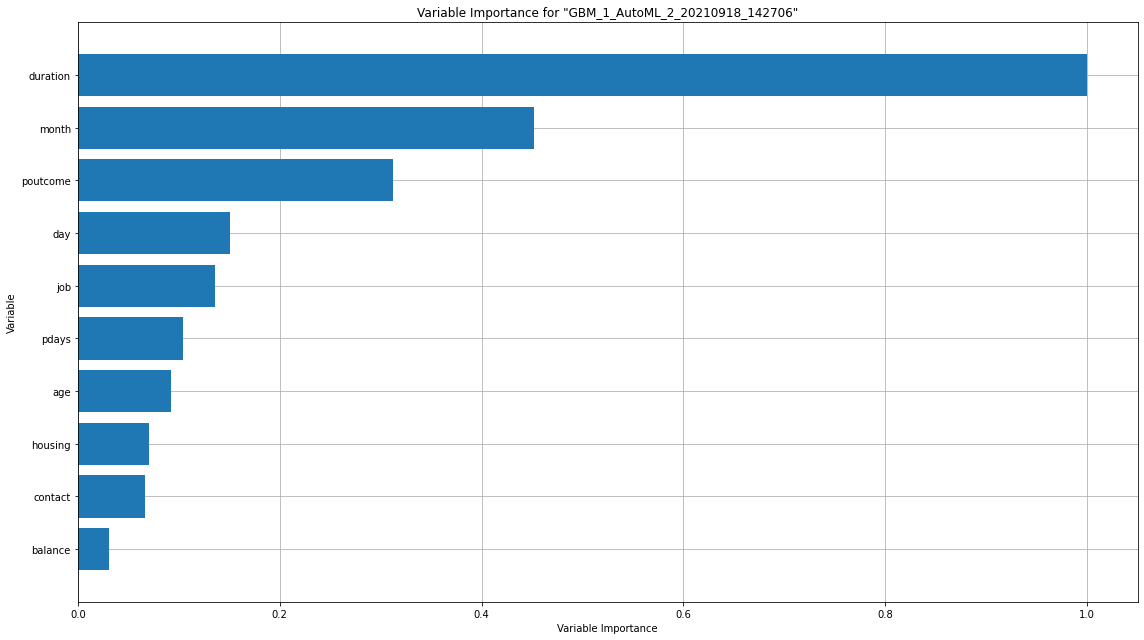

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

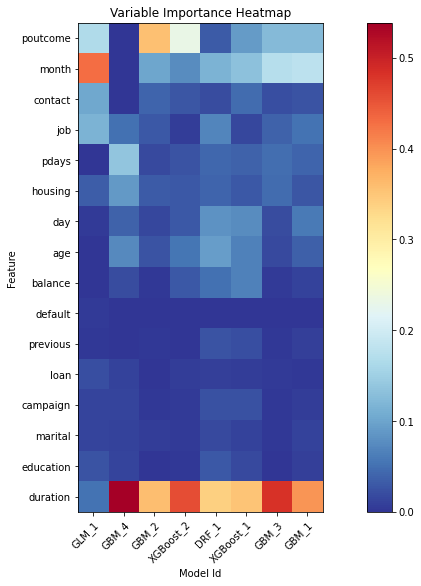

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

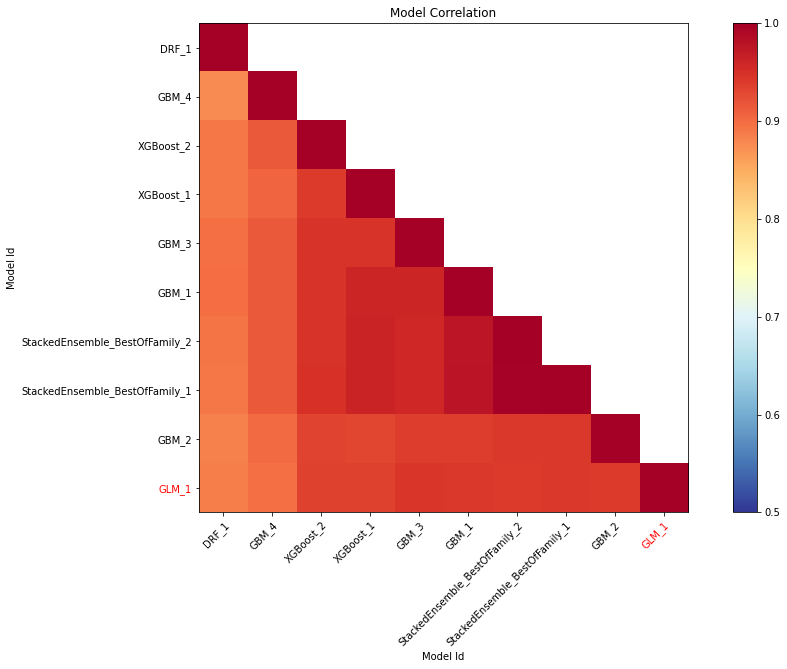

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

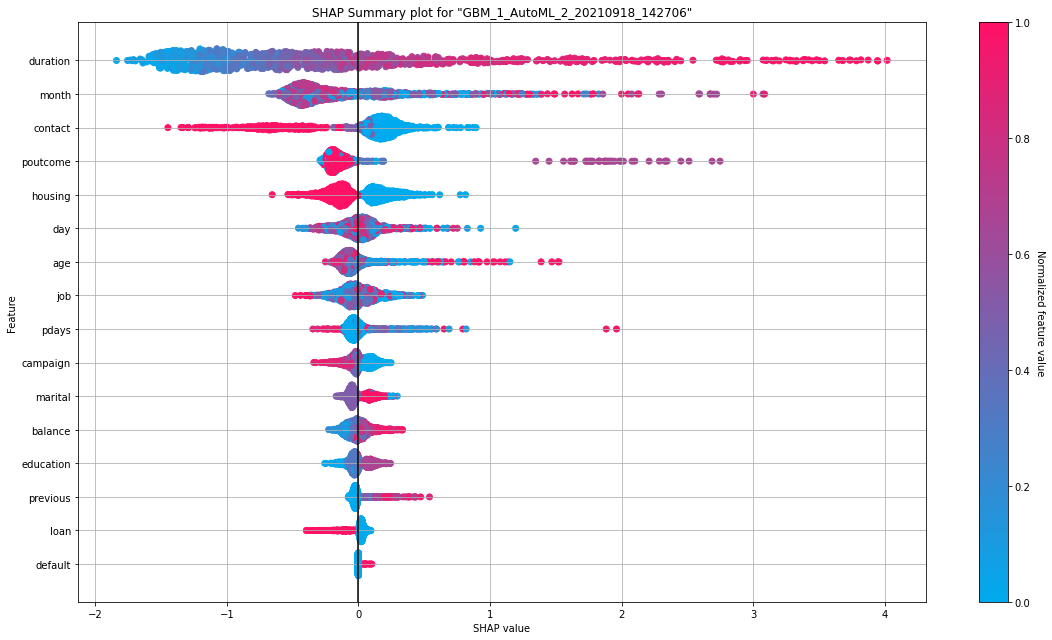

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

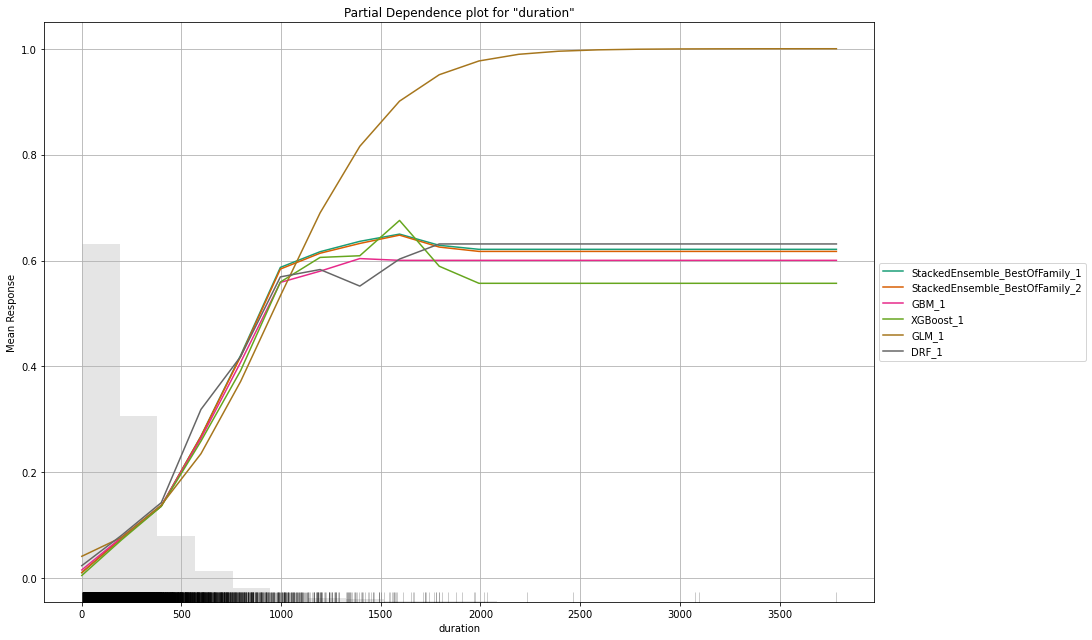

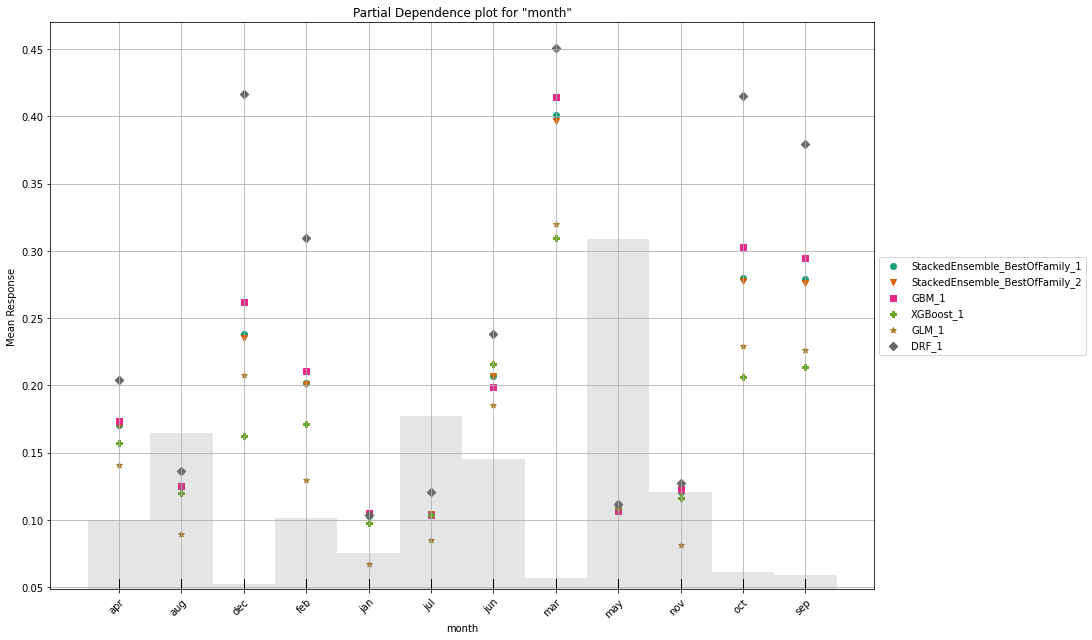

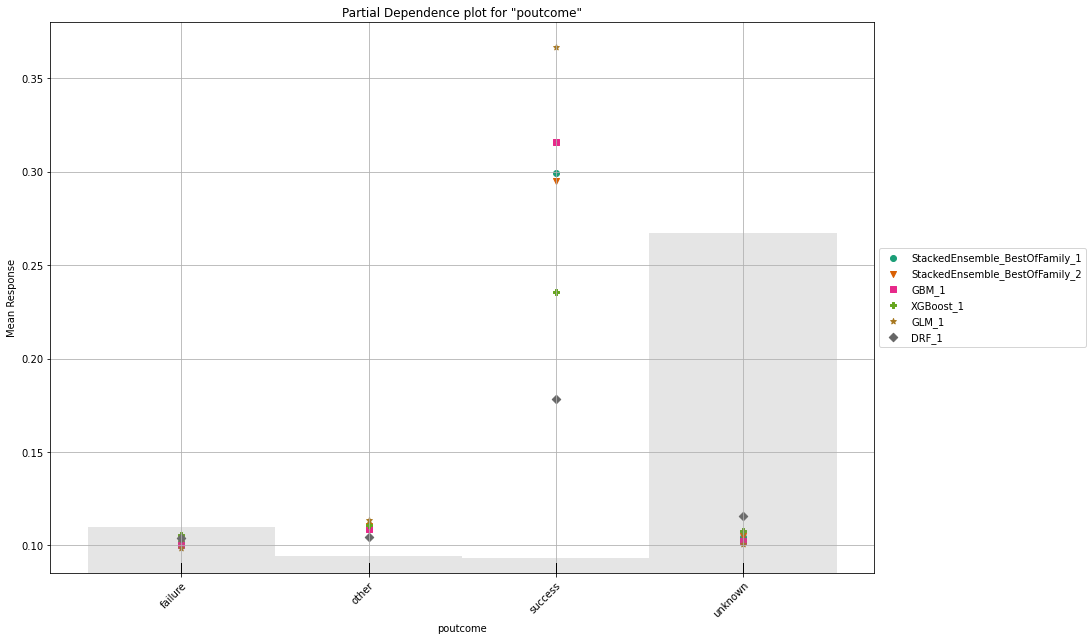

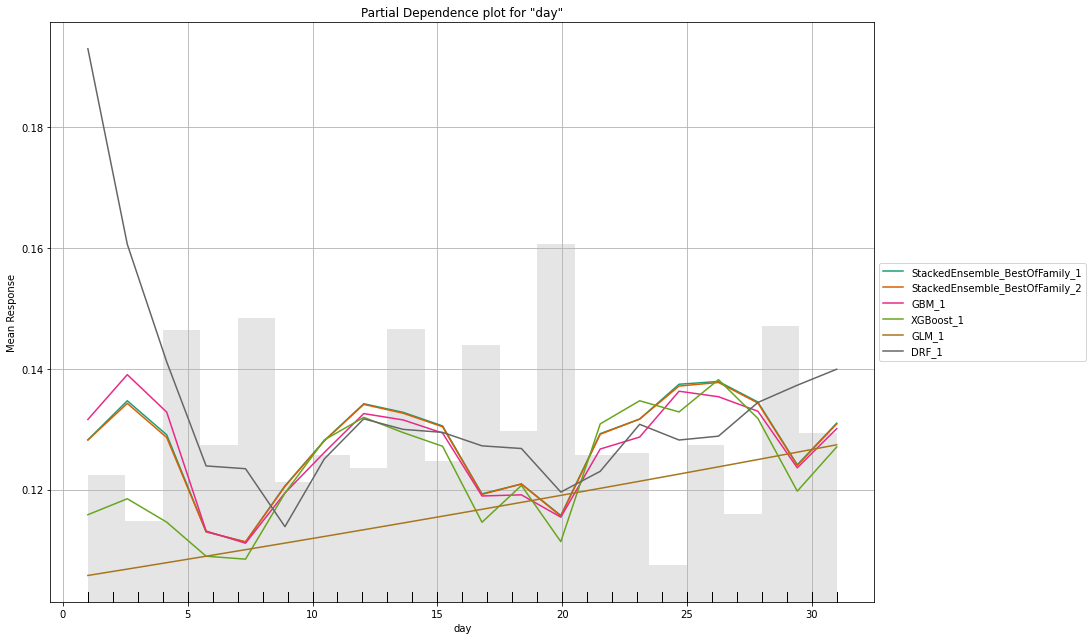

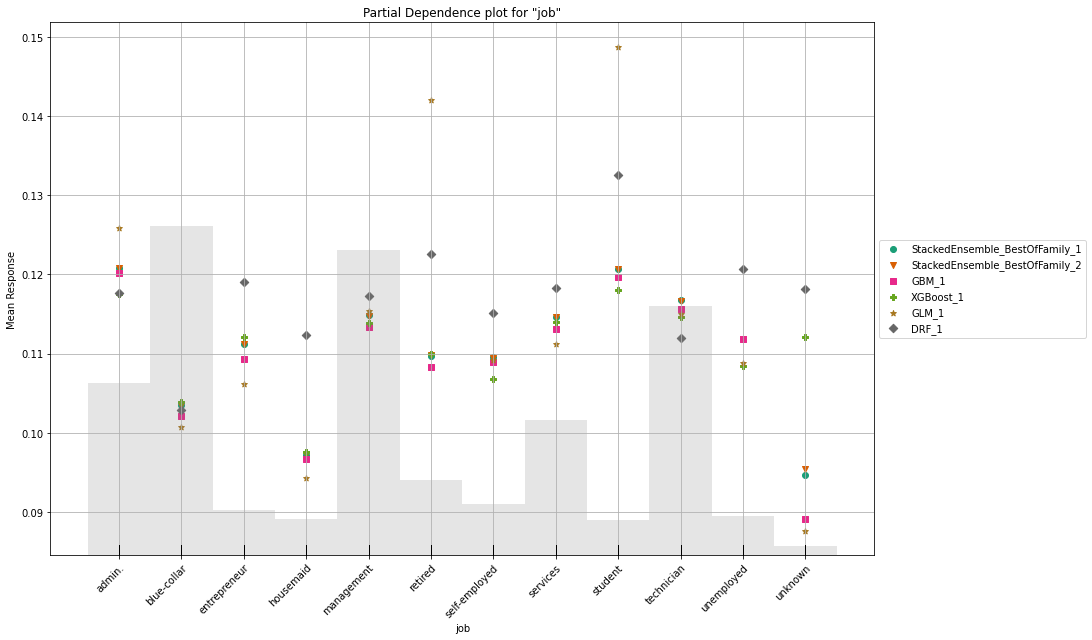

In [24]:
# Descripcion de todos los modelos entrenados
exa = aml.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_2_20210918_142706


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2834331525894498: 


,,no,yes,Error,Rate
0,no,7432.0,585.0,0.073,(585.0/8017.0)
1,yes,282.0,782.0,0.265,(282.0/1064.0)
2,Total,7714.0,1367.0,0.0955,(867.0/9081.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

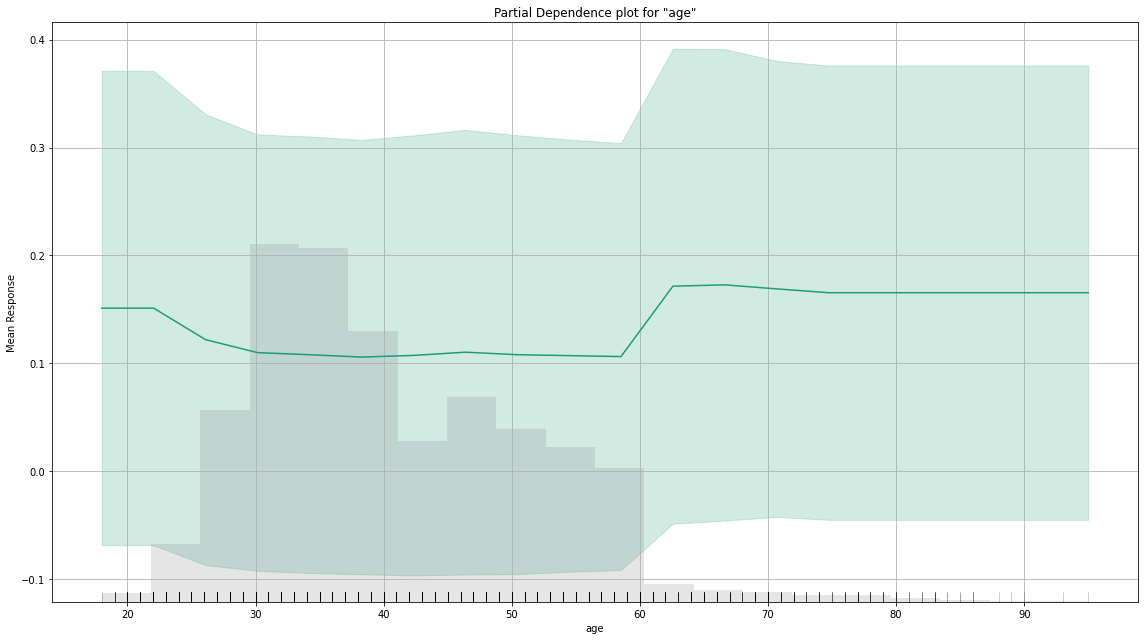

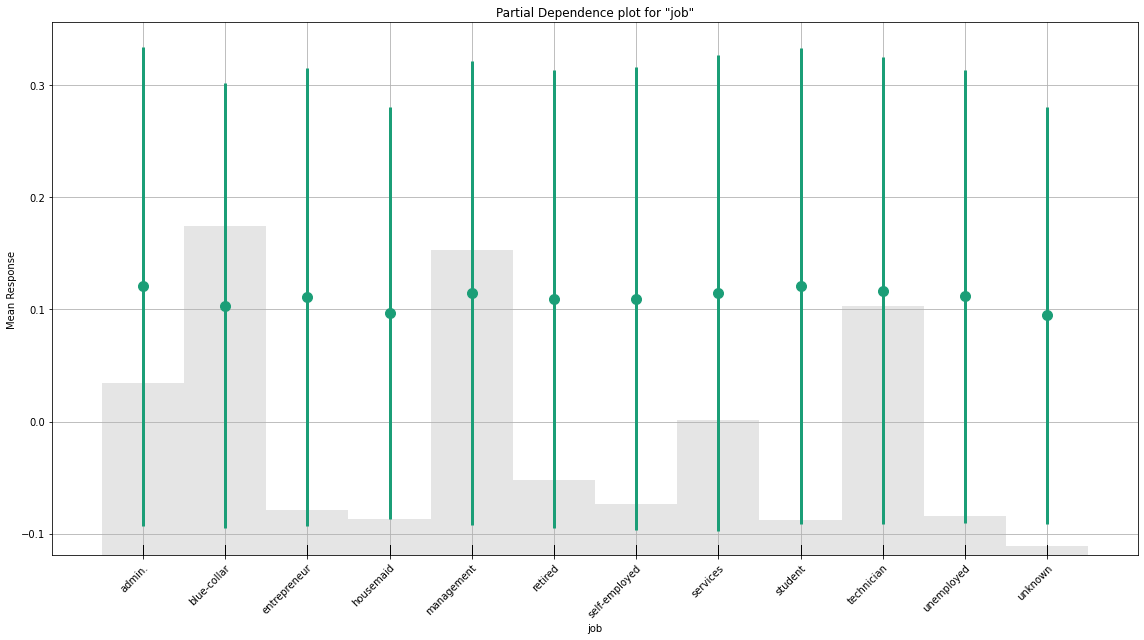

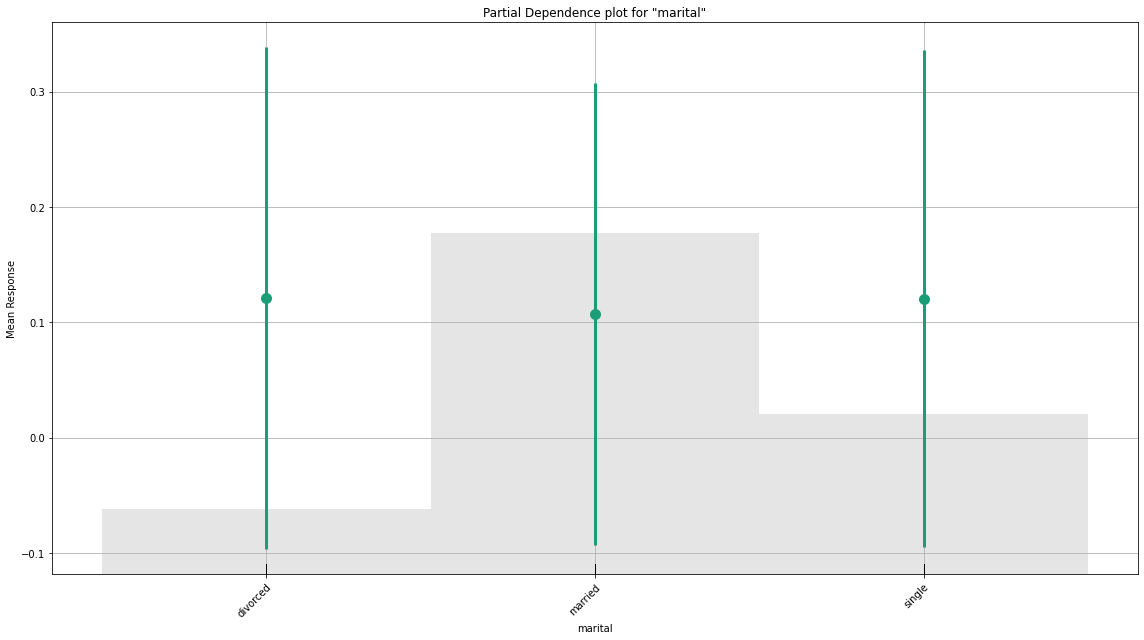

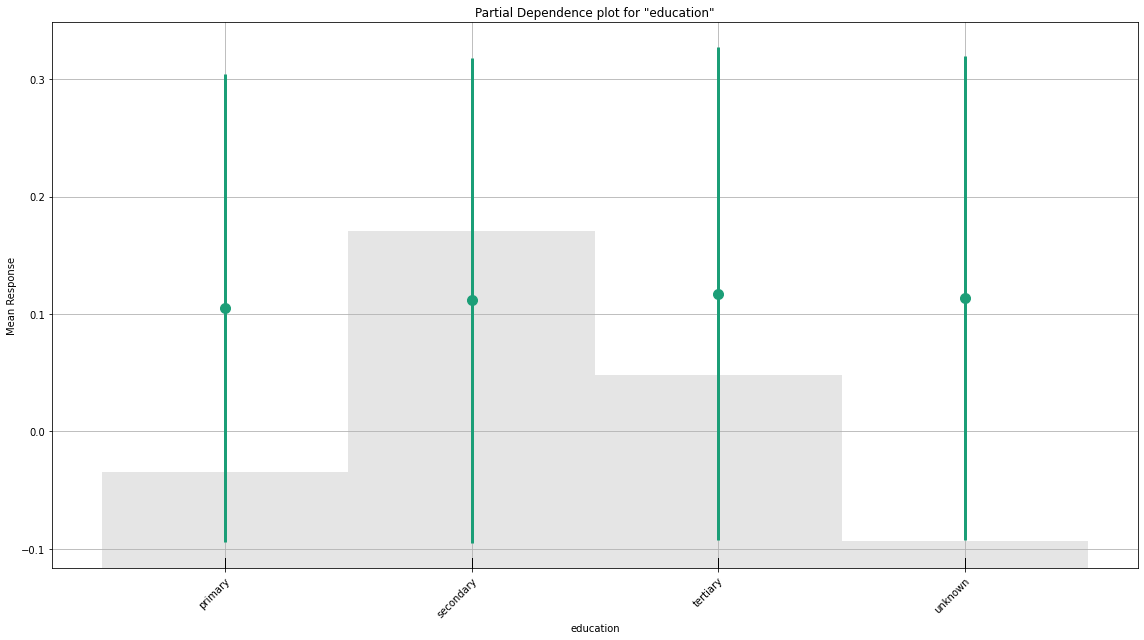

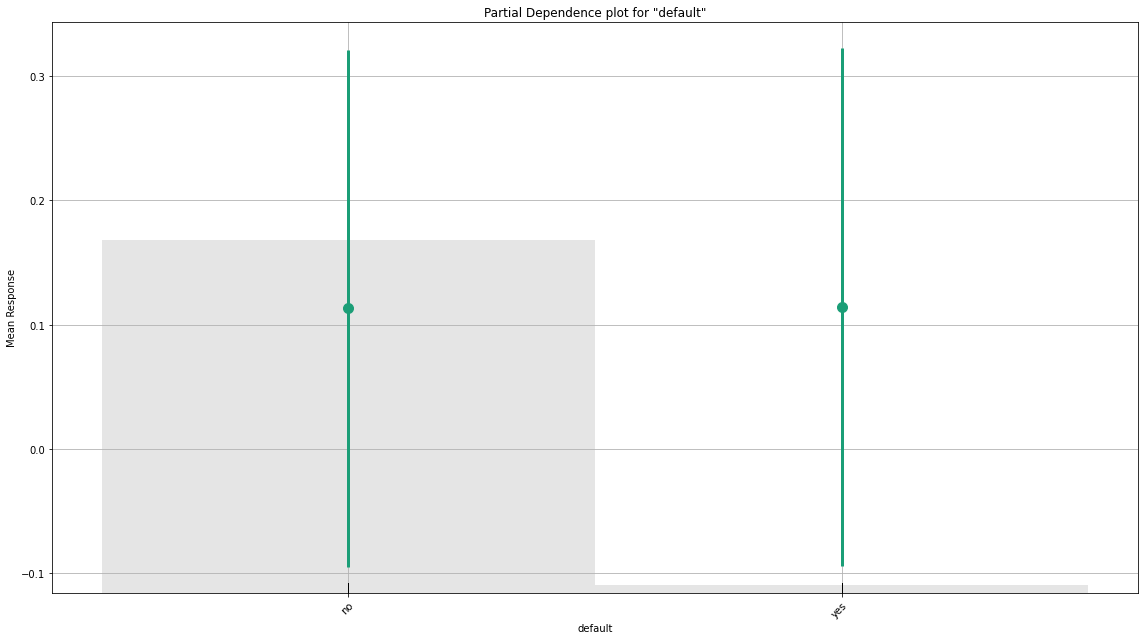

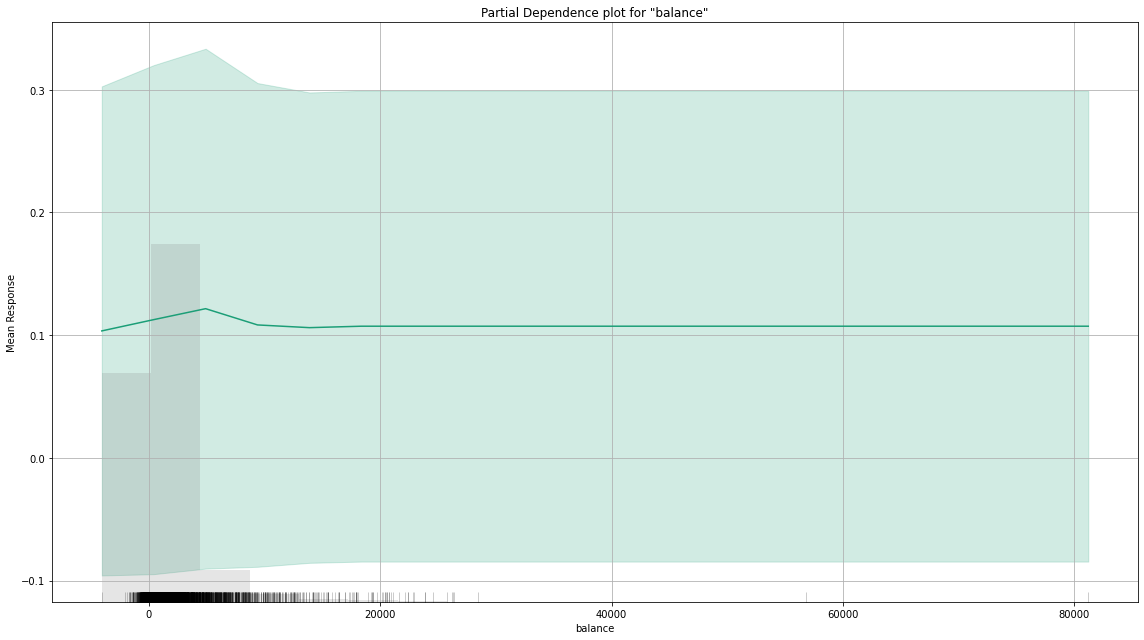

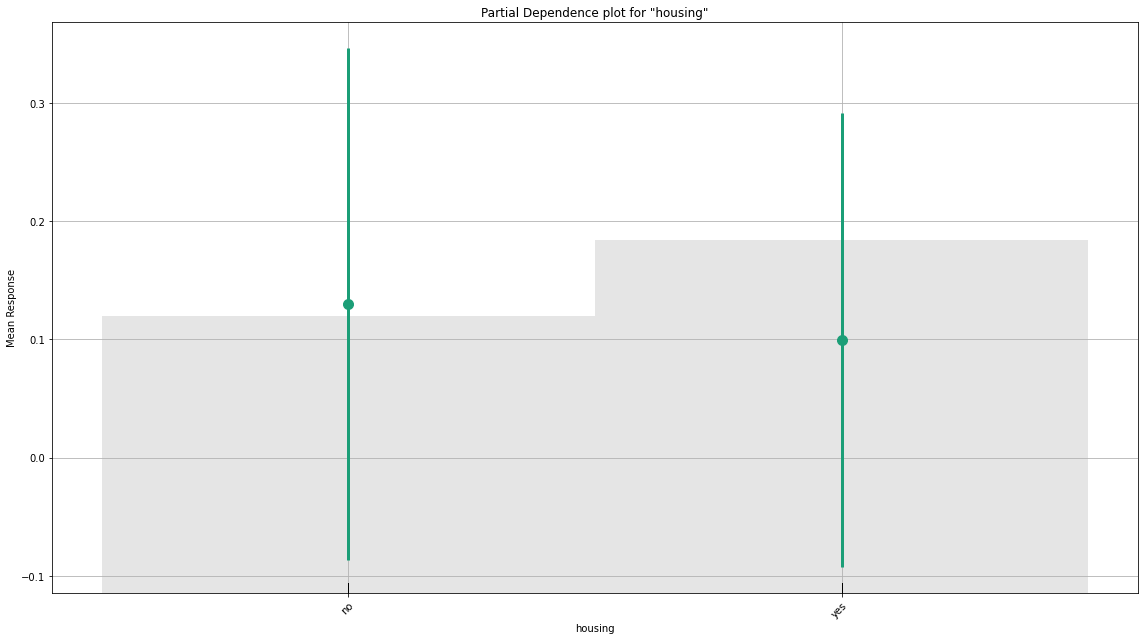

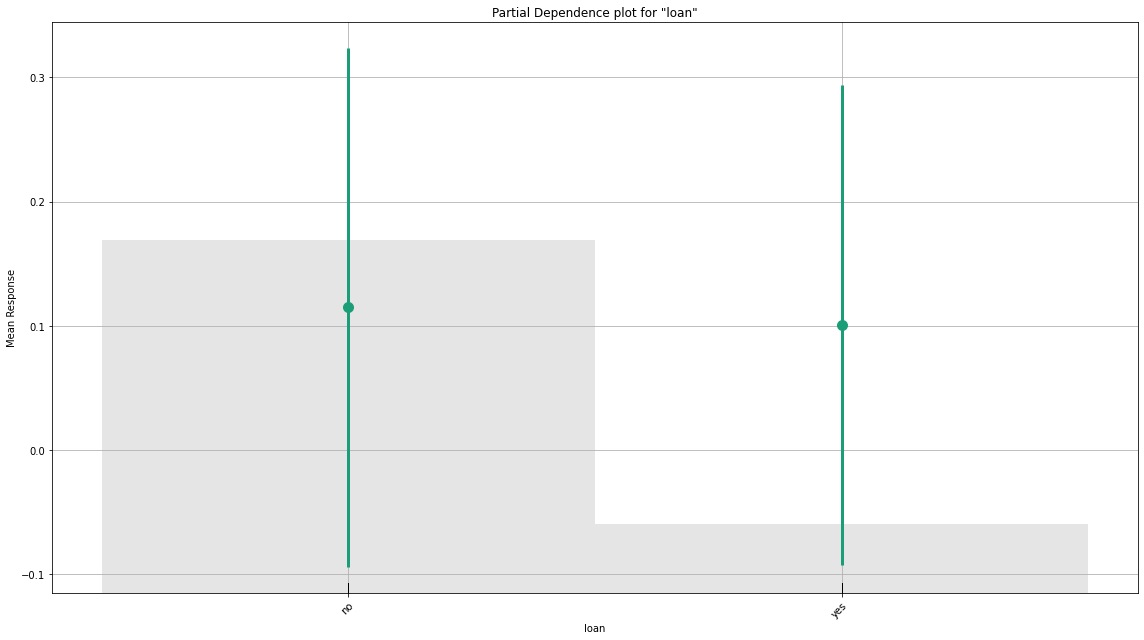

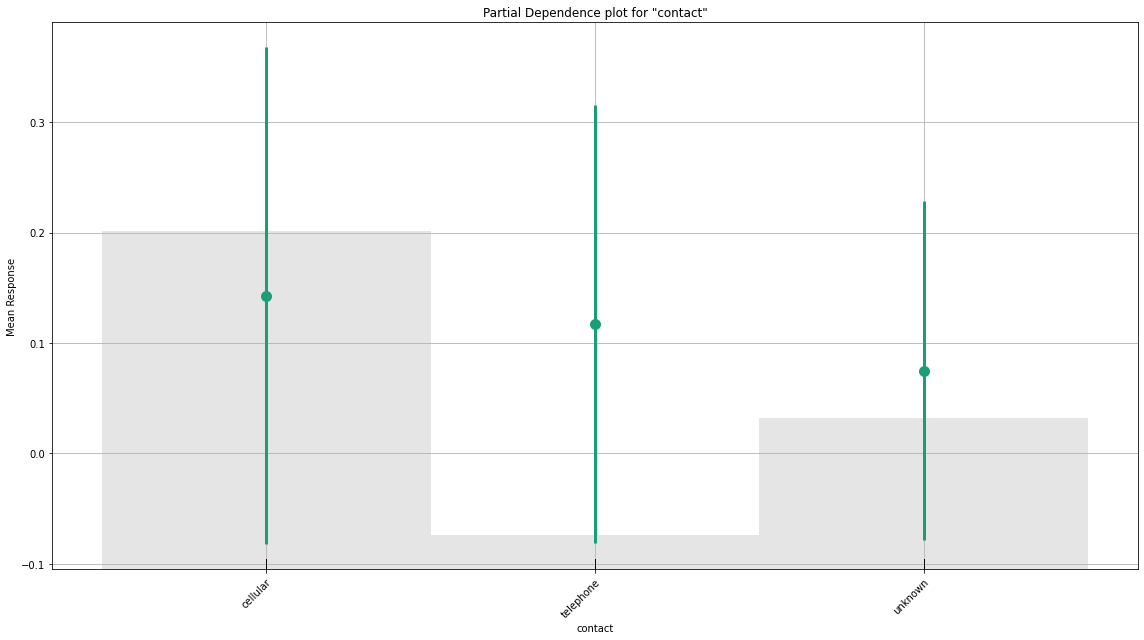

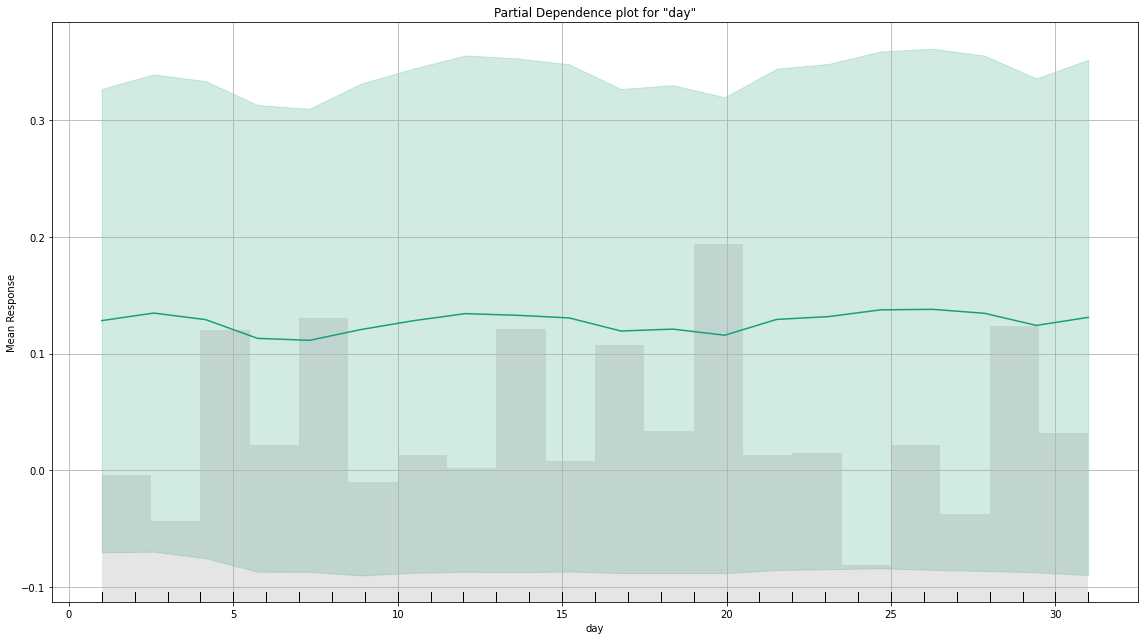

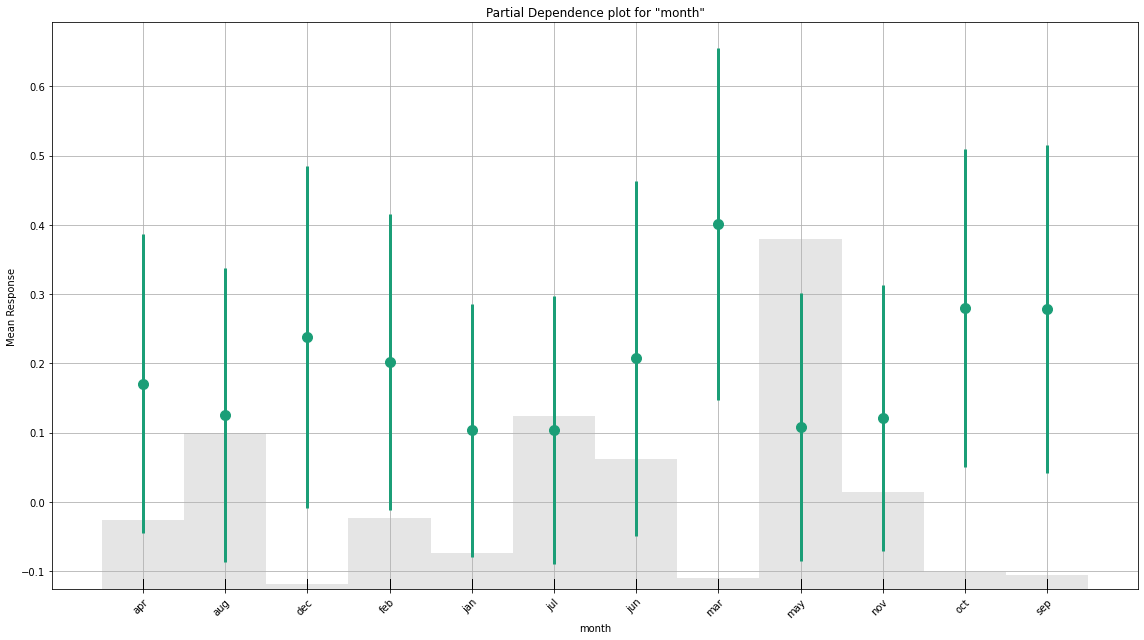

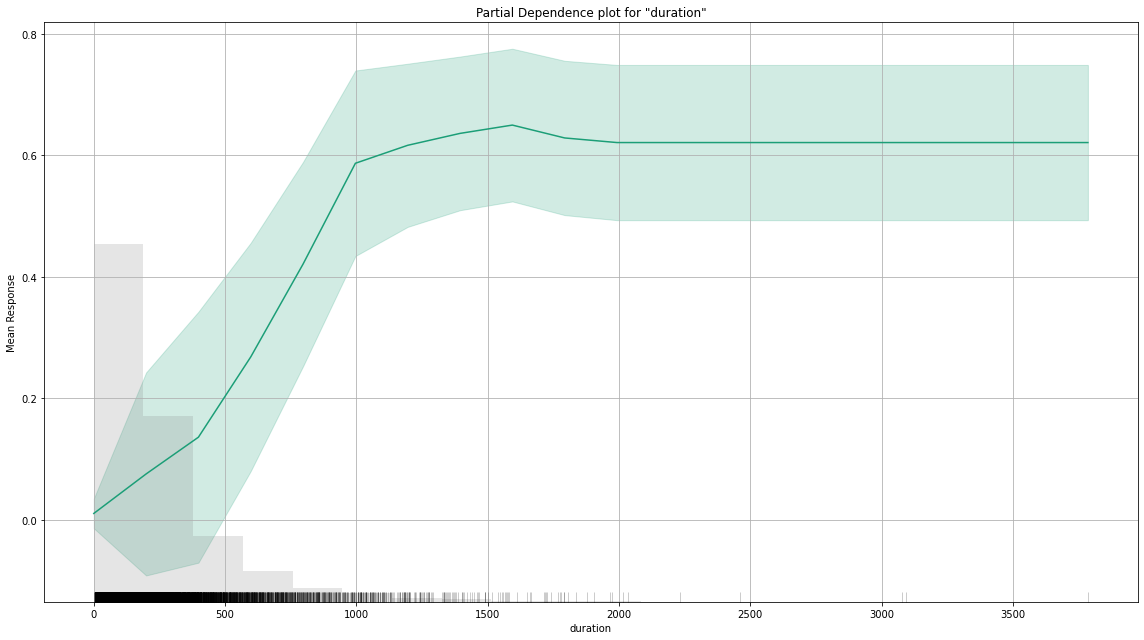

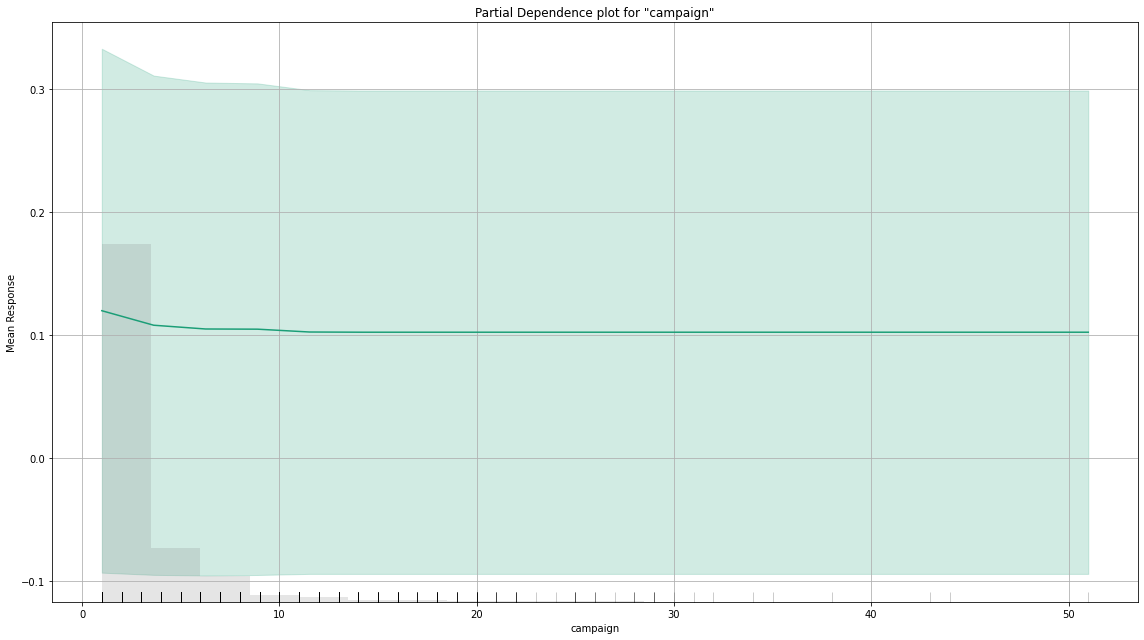

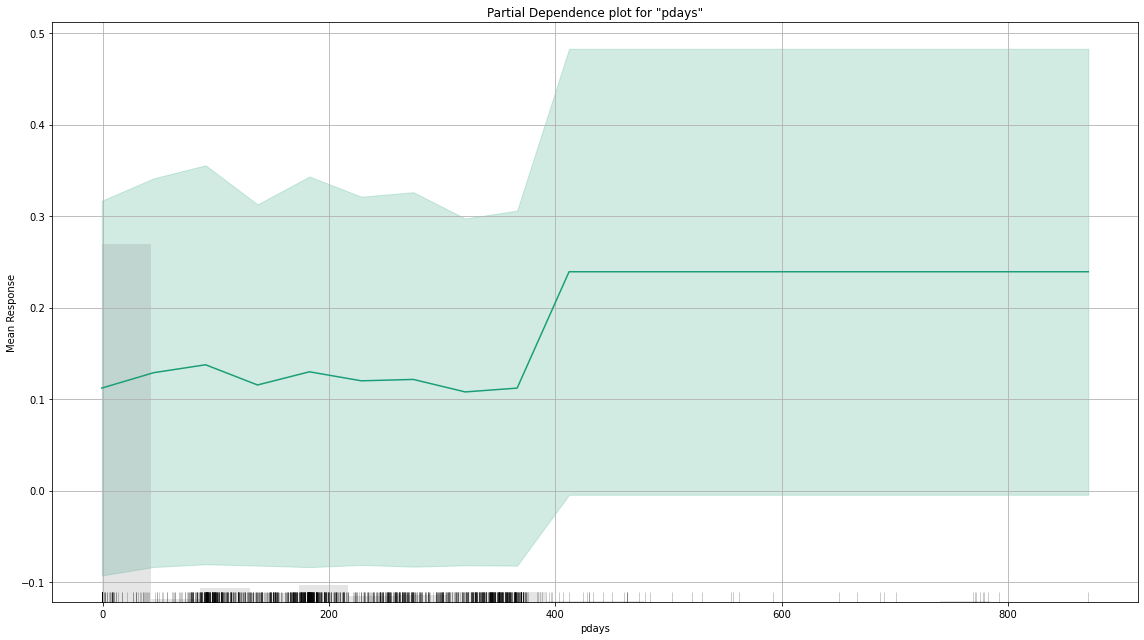

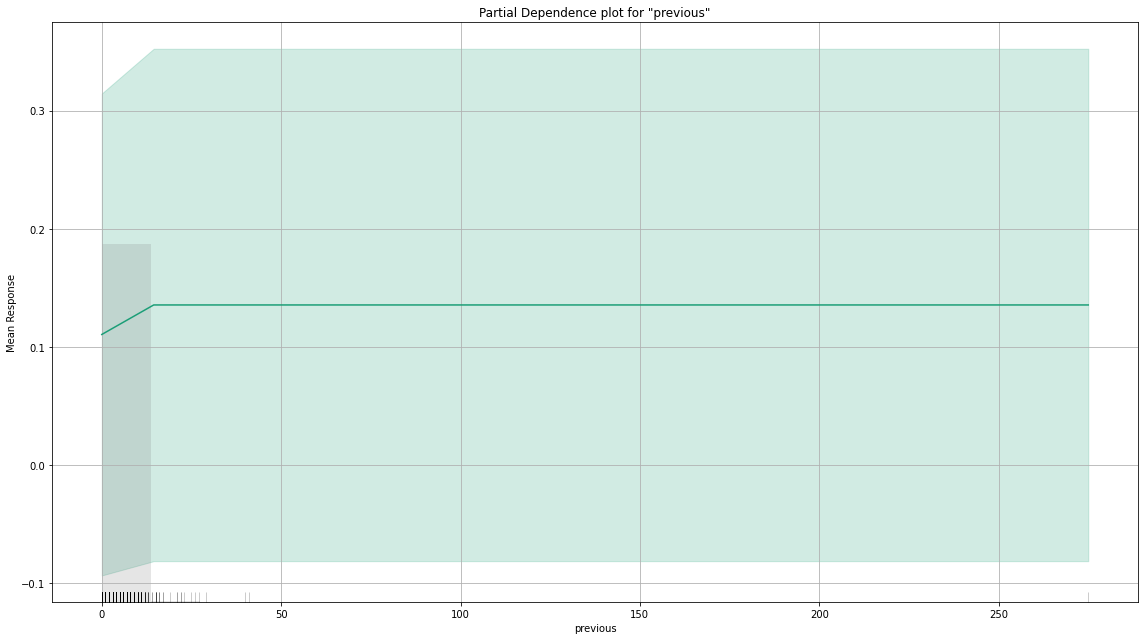

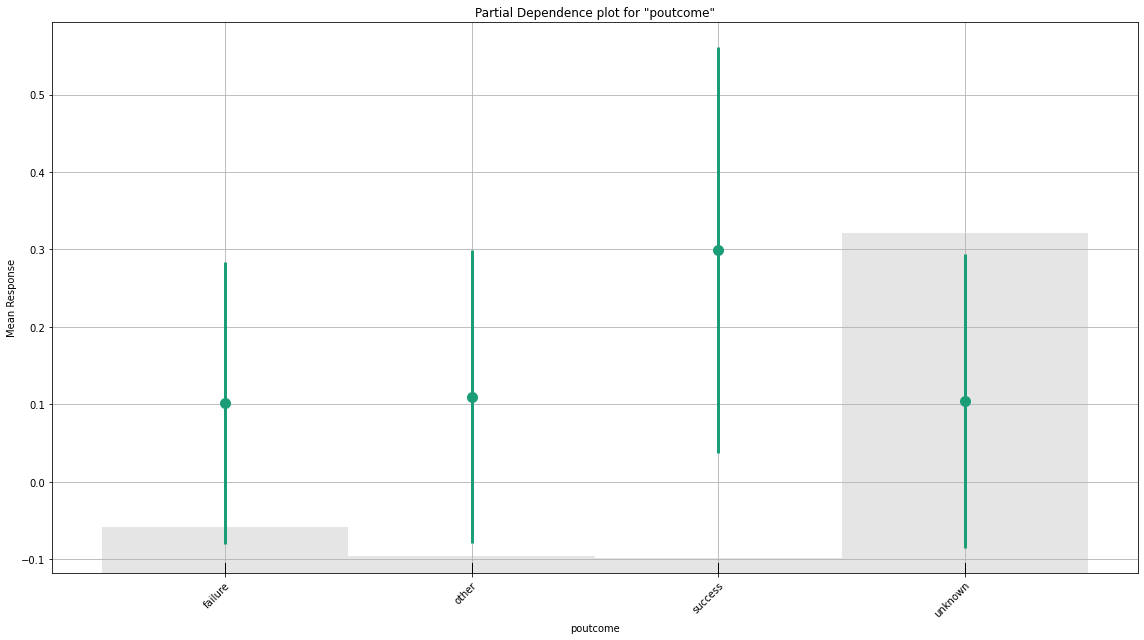

In [25]:
exa = aml.leader.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20210918_142307


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3599256017656368: 


,,no,yes,Error,Rate
0,no,7483.0,494.0,0.0619,(494.0/7977.0)
1,yes,334.0,684.0,0.3281,(334.0/1018.0)
2,Total,7817.0,1178.0,0.0921,(828.0/8995.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

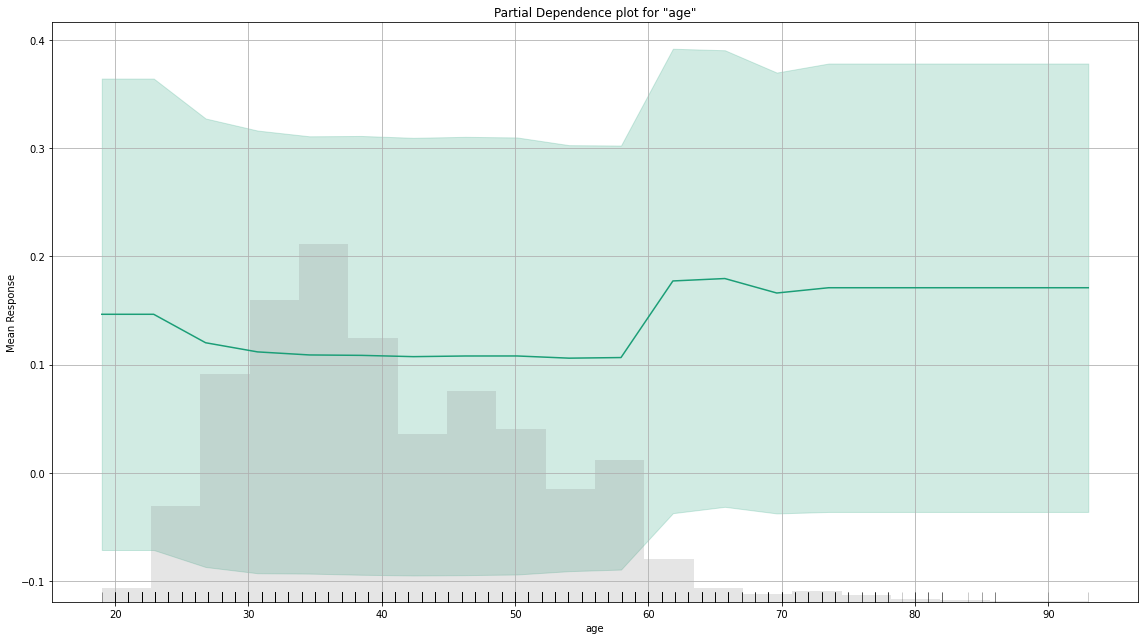

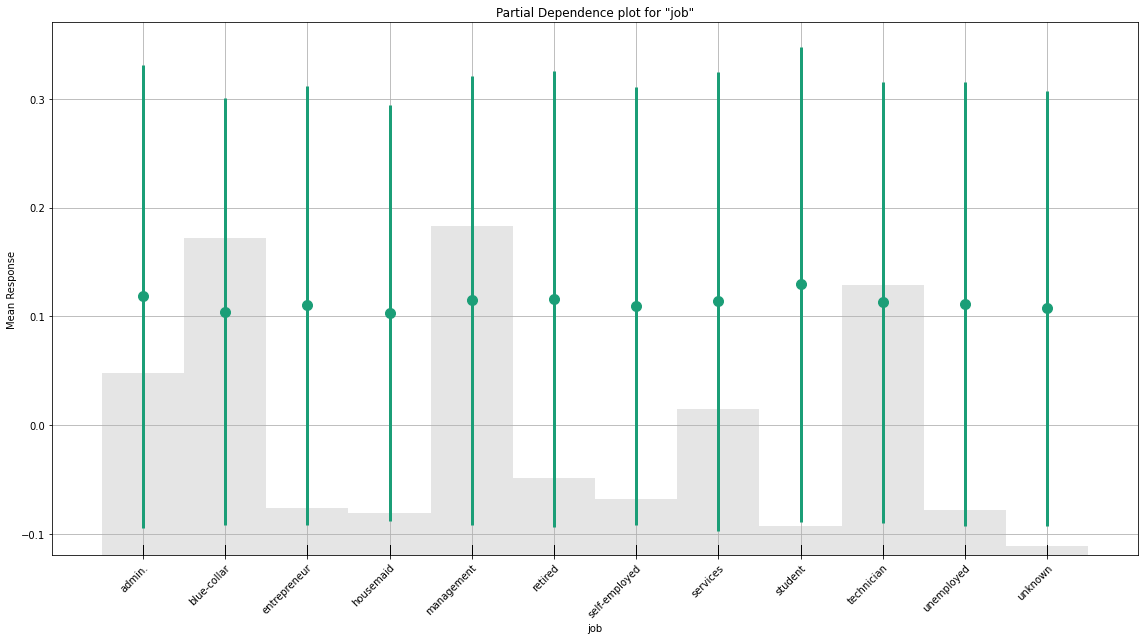

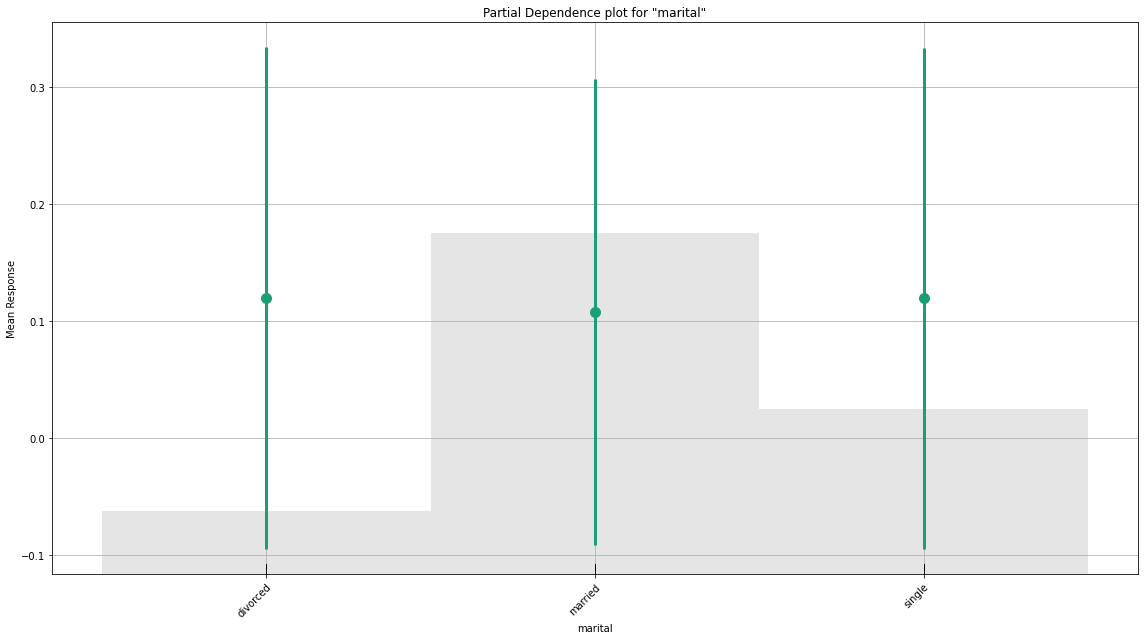

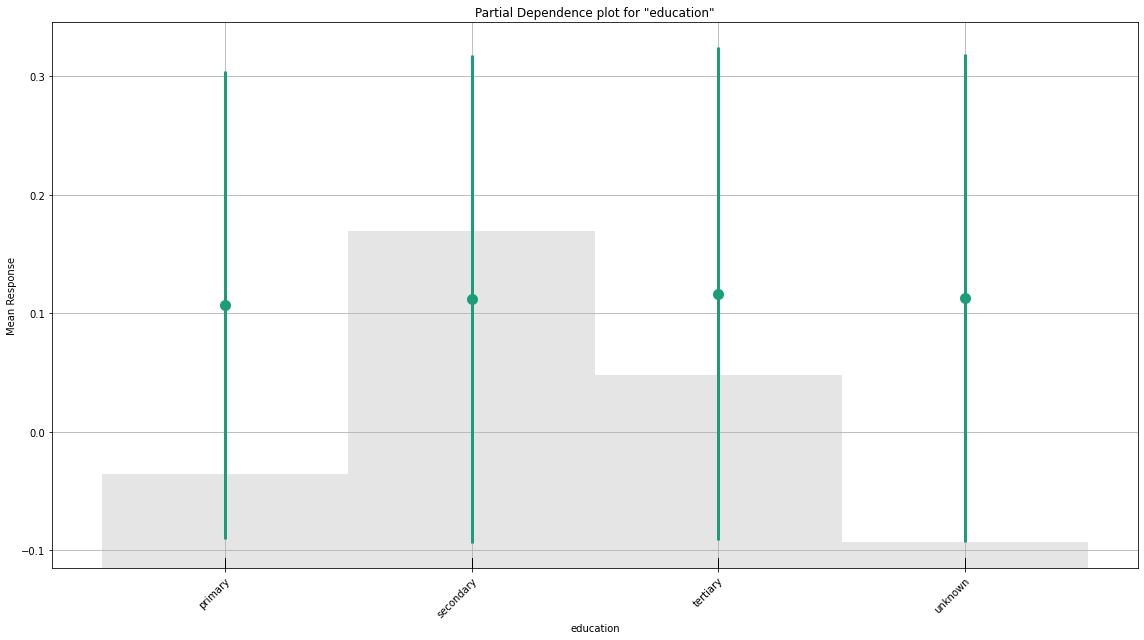

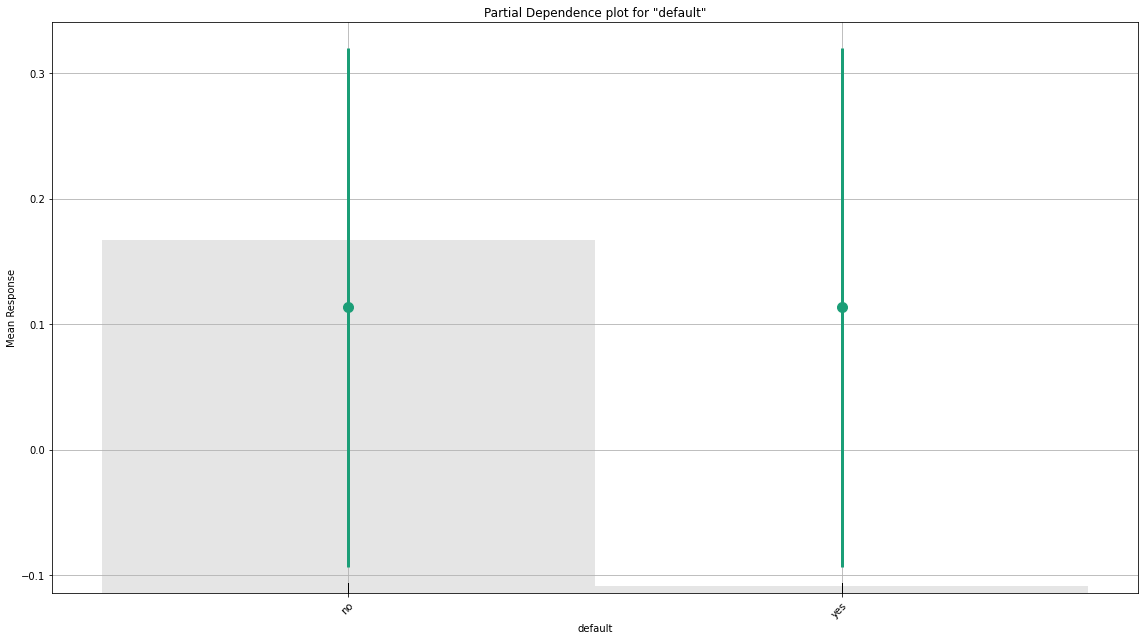

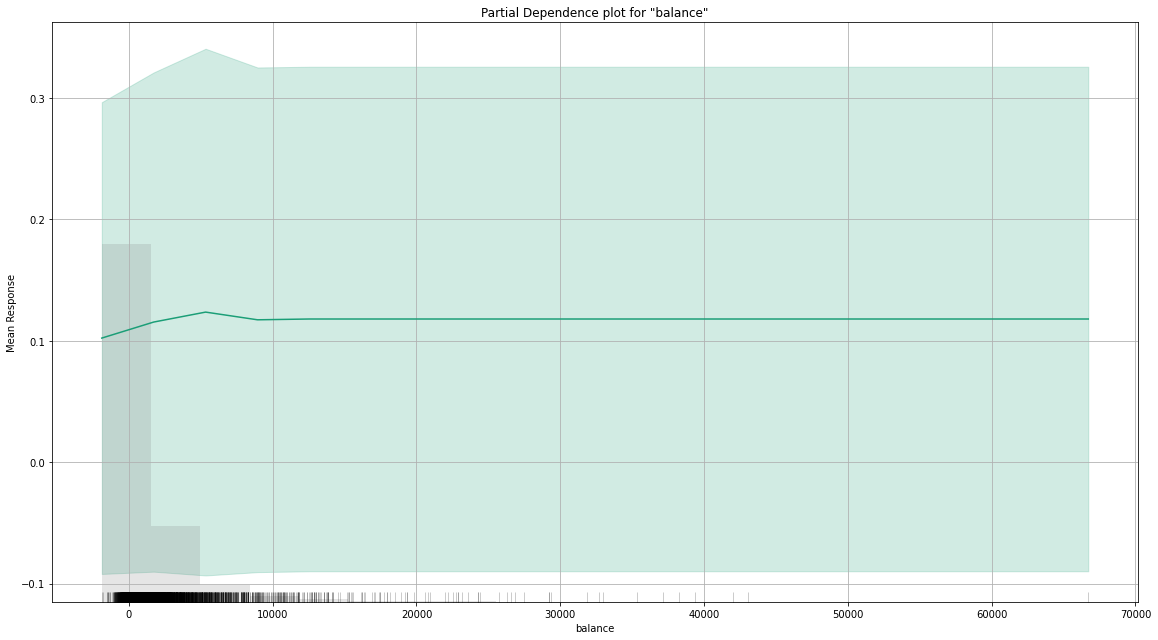

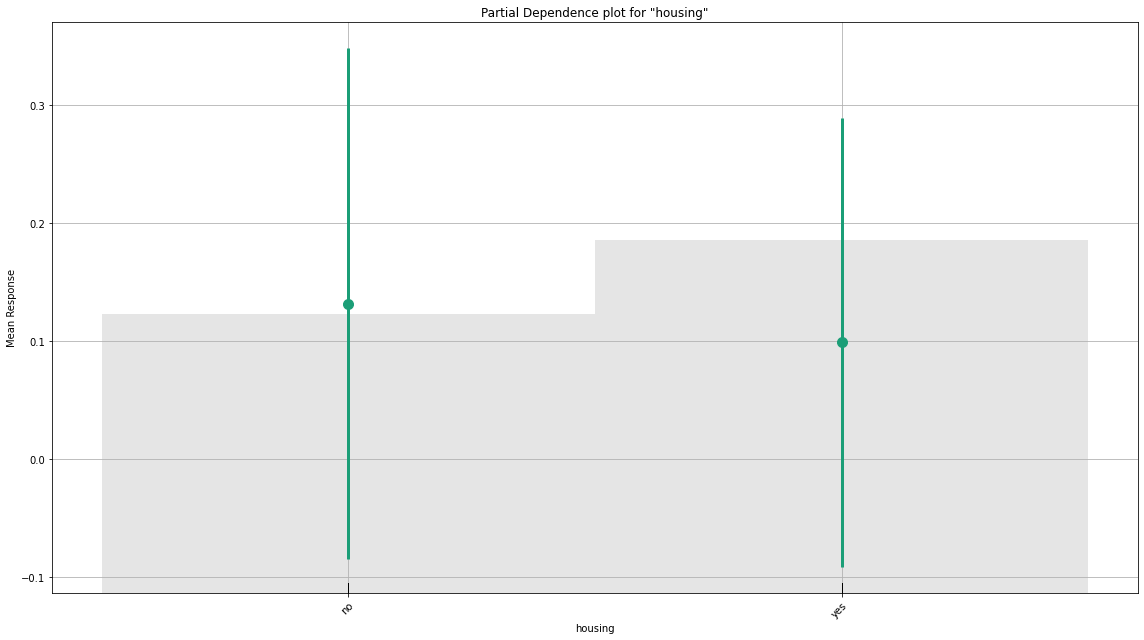

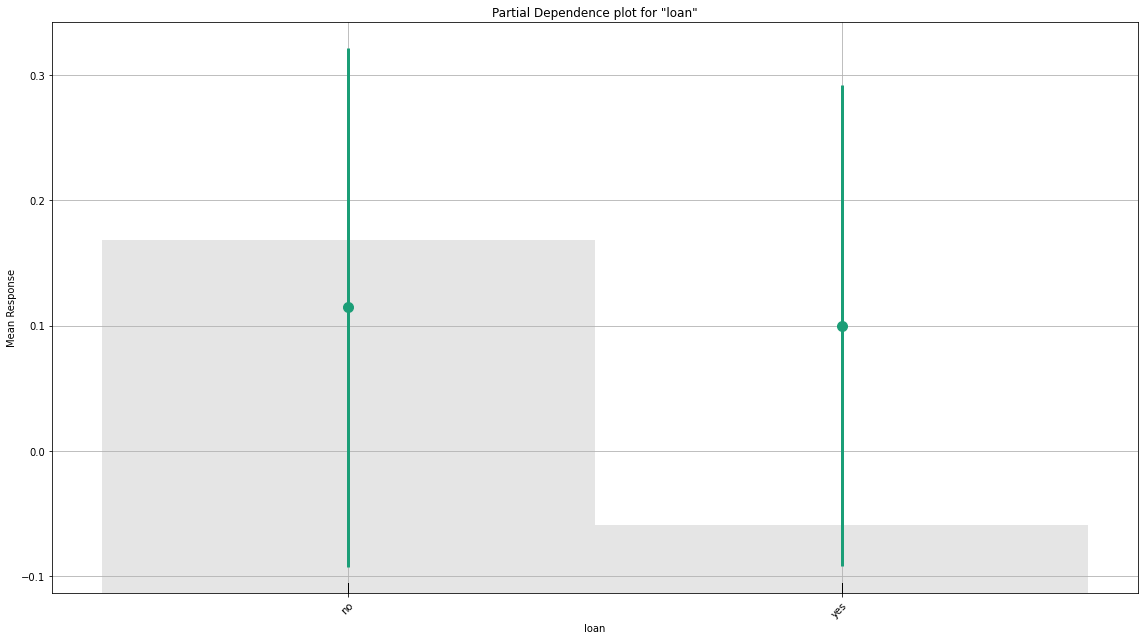

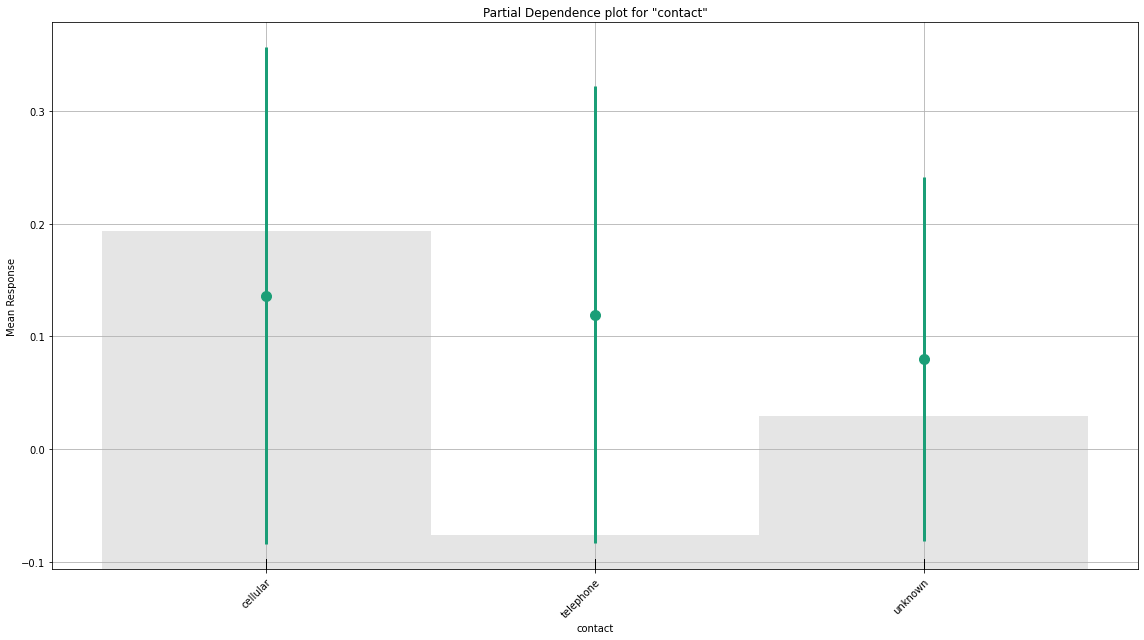

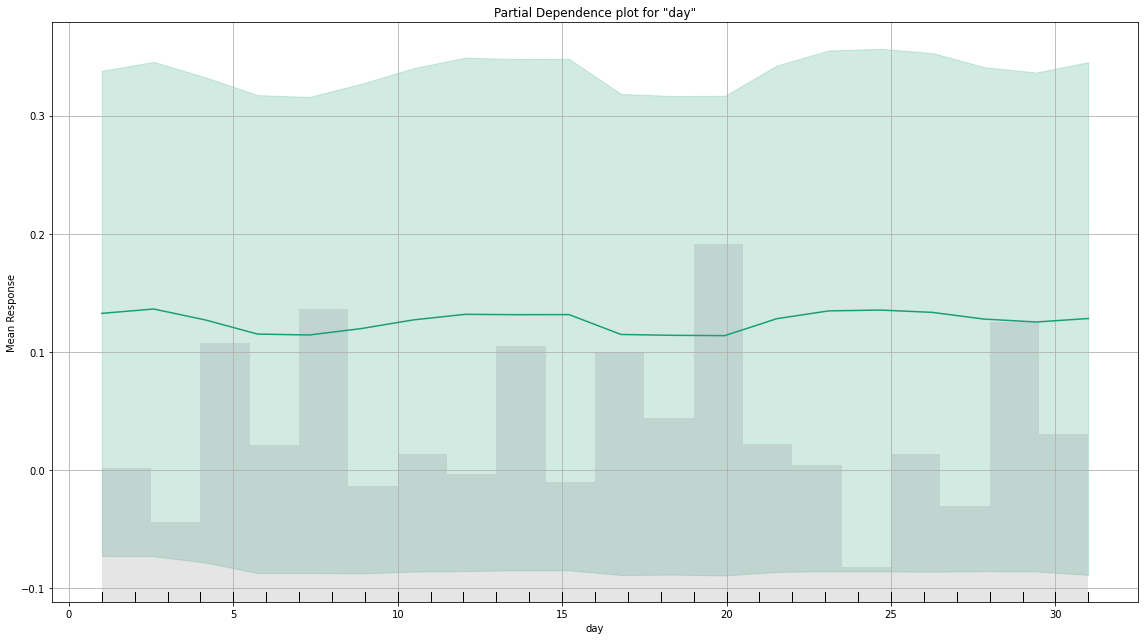

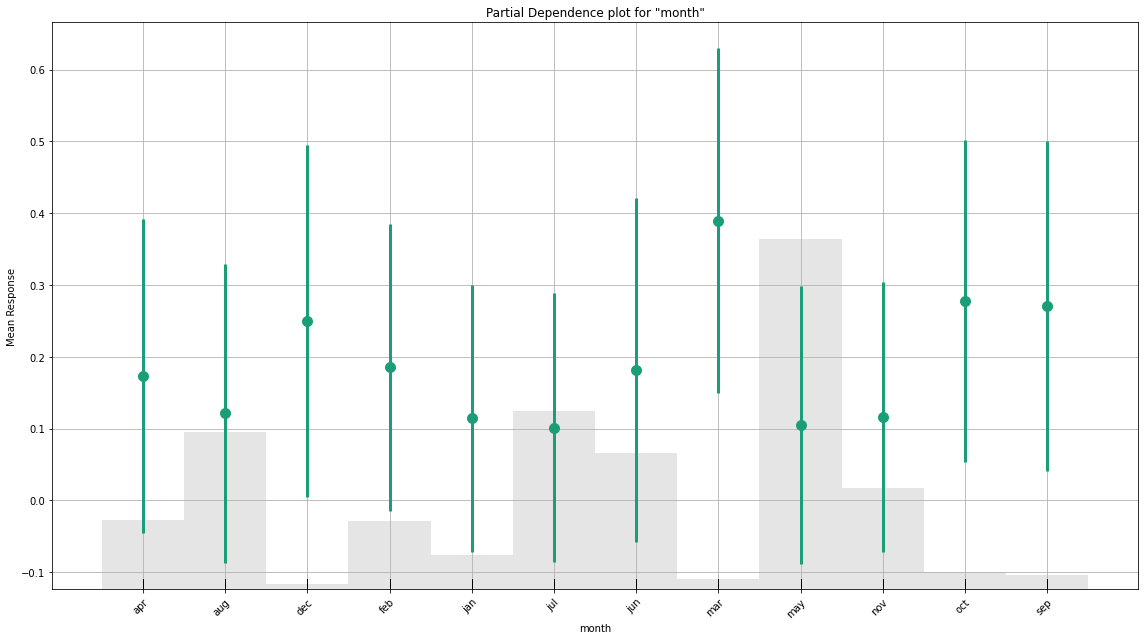

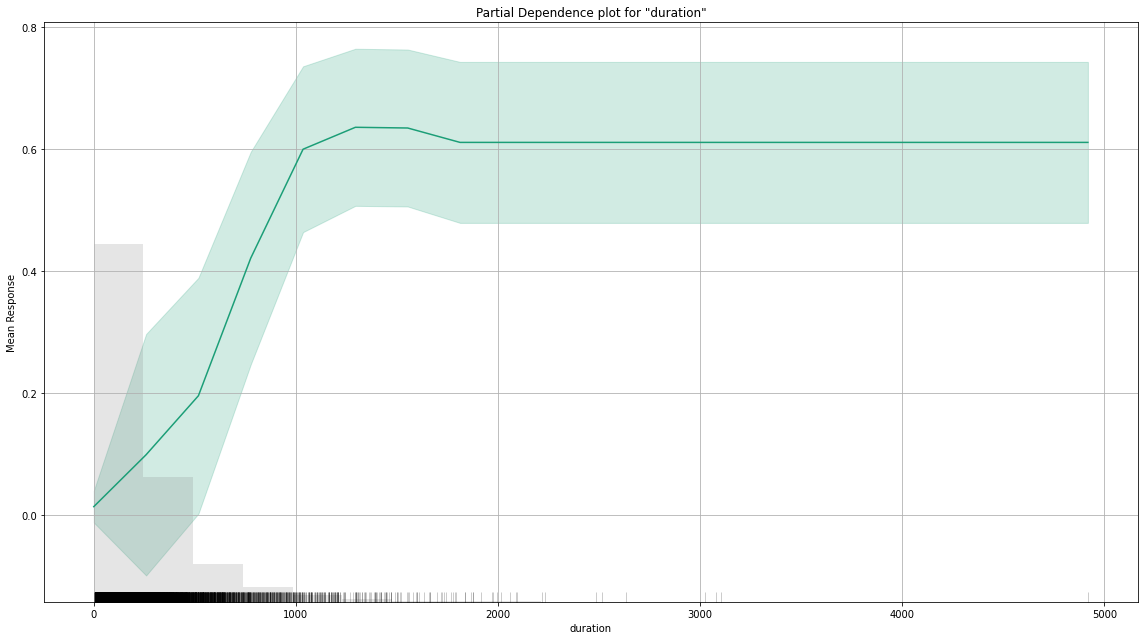

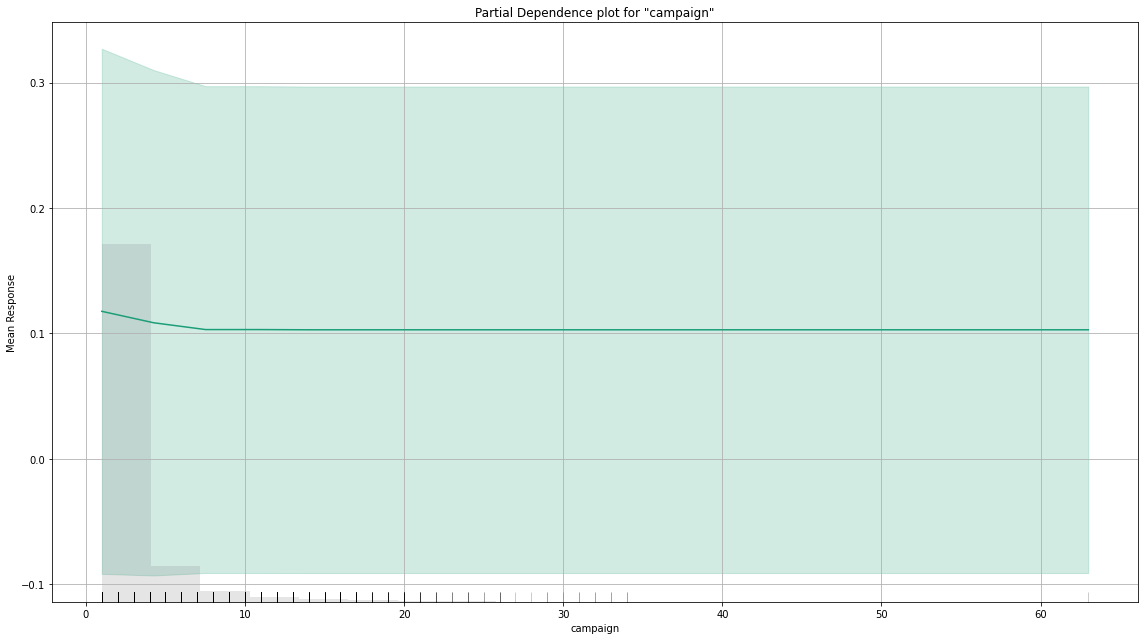

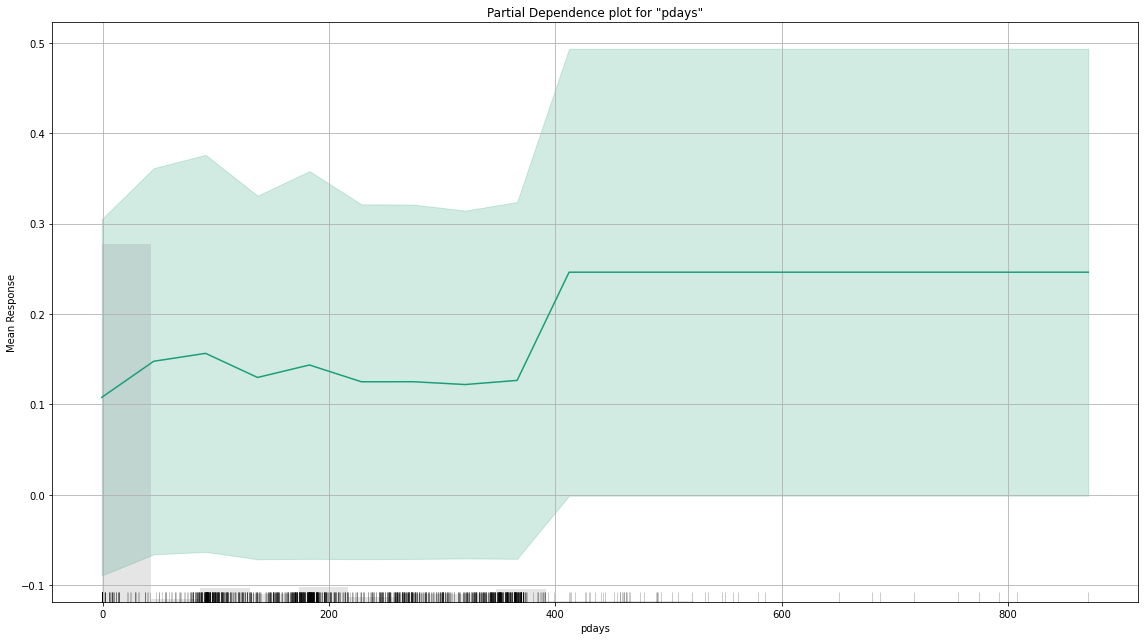

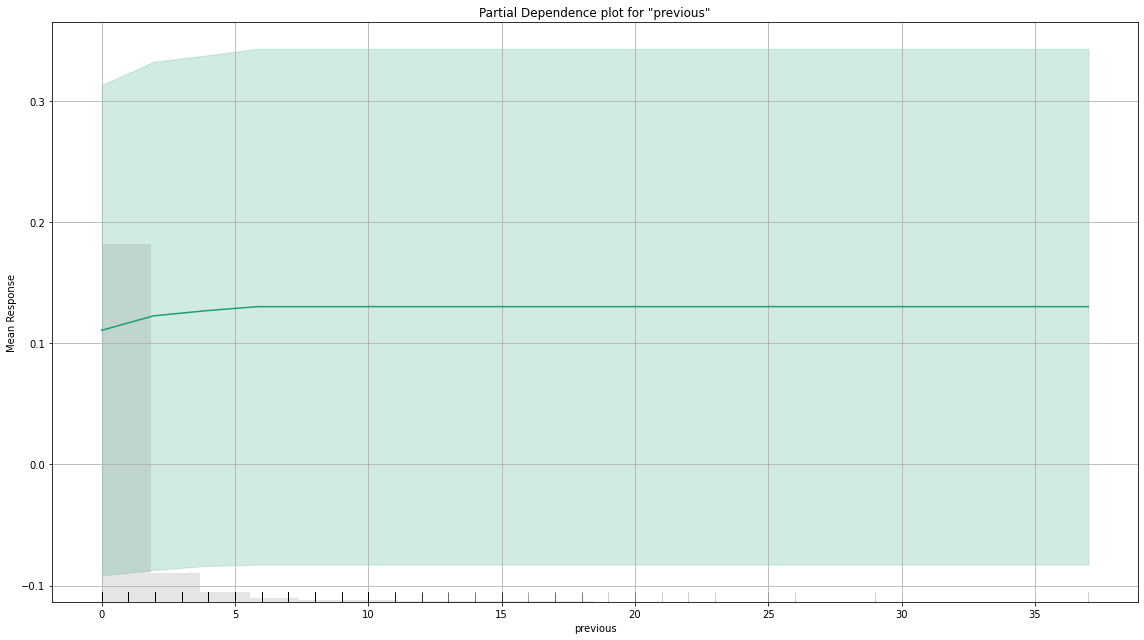

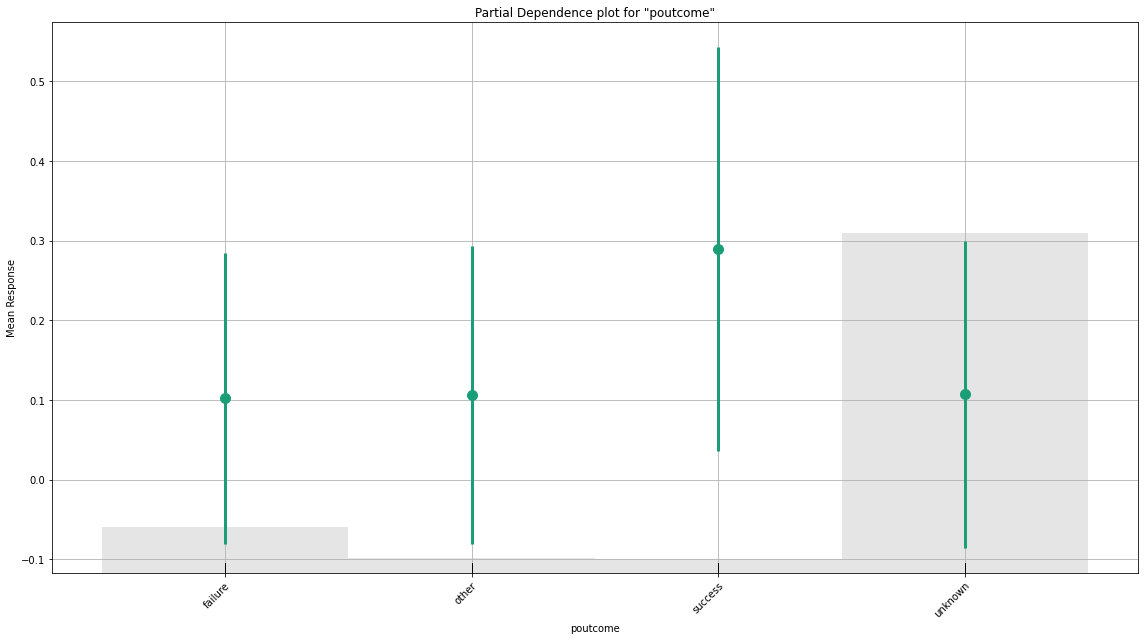

In [12]:
# Descripcion del mejor modelo obtenido
exa = aml.leader.explain(test)

In [13]:
# Performande del mejor modelo
aml.leader.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.06047521805564754
RMSE: 0.24591709589950744
LogLoss: 0.19376626100422153
Null degrees of freedom: 8994
Residual degrees of freedom: 8992
Null deviance: 6354.254597016852
Residual deviance: 3485.8550354659446
AIC: 3491.8550354659446
AUC: 0.9369414350146651
AUCPR: 0.6322131418427512
Gini: 0.8738828700293302

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3599256017656368: 


,,no,yes,Error,Rate
0,no,7483.0,494.0,0.0619,(494.0/7977.0)
1,yes,334.0,684.0,0.3281,(334.0/1018.0)
2,Total,7817.0,1178.0,0.0921,(828.0/8995.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.359926,0.622951,185.0
1,max f2,0.125983,0.735245,280.0
2,max f0point5,0.455076,0.614147,149.0
3,max accuracy,0.502666,0.912840,131.0
4,max precision,0.946454,1.000000,0.0
5,max recall,0.008249,1.000000,387.0
6,max specificity,0.946454,1.000000,0.0
7,max absolute_mcc,0.260368,0.574790,223.0
8,max min_per_class_accuracy,0.129742,0.866405,278.0
9,max mean_per_class_accuracy,0.063145,0.871724,319.0



Gains/Lift Table: Avg response rate: 11.32 %, avg score: 11.32 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010006,0.851279,7.559649,7.559649,0.855556,0.891661,0.855556,0.891661,0.075639,0.075639,655.964855,655.964855,0.074009
1,2,0.020011,0.786129,6.577876,7.068762,0.744444,0.821814,0.800000,0.856737,0.065815,0.141454,557.787601,606.876228,0.136941
2,3,0.030017,0.722879,6.479699,6.872408,0.733333,0.754604,0.777778,0.822693,0.064833,0.206287,547.969876,587.240777,0.198765
3,4,0.040022,0.672782,5.792458,6.602420,0.655556,0.697277,0.747222,0.791339,0.057957,0.264244,479.245798,560.242032,0.252836
4,5,0.050028,0.640016,4.908863,6.263709,0.555556,0.658266,0.708889,0.764724,0.049116,0.313360,390.886269,526.370880,0.296937
5,6,0.100056,0.461070,4.830321,5.547015,0.546667,0.545268,0.627778,0.654996,0.241650,0.555010,383.032089,454.701484,0.513014
6,7,0.150083,0.289782,3.357662,4.817231,0.380000,0.378750,0.545185,0.562914,0.167976,0.722986,235.766208,381.723059,0.646015
7,8,0.200000,0.157978,2.302464,4.189587,0.260579,0.218689,0.474152,0.477001,0.114931,0.837917,130.246433,318.958743,0.719327
8,9,0.300056,0.045924,1.109403,3.162479,0.125556,0.089204,0.357910,0.347688,0.111002,0.948919,10.940297,216.247886,0.731670
9,10,0.400000,0.021875,0.344003,2.458251,0.038932,0.031484,0.278210,0.268681,0.034381,0.983301,-65.599739,145.825147,0.657740


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,no,yes
StackedEnsemble_BestOfFamily_1_AutoML_1_20210918_142307,0.930721,0.205519,0.607321,0.166186,0.253131,0.0640754,5074,0.020819,StackedEnsemble,no,0.992169,0.00783091
GBM_1_AutoML_1_20210918_142307,0.928977,0.217237,0.601878,0.176573,0.256299,0.065689,4816,0.016219,GBM,no,0.968664,0.0313357
XGBoost_1_AutoML_1_20210918_142307,0.925019,0.213775,0.591697,0.184341,0.256616,0.0658515,5310,0.004558,XGBoost,no,0.992918,0.00708192
GLM_1_AutoML_1_20210918_142307,0.905742,0.241351,0.549864,0.205816,0.267893,0.0717669,14578,0.002359,GLM,no,0.98461,0.0153904
XGBoost_2_AutoML_1_20210918_142307,0.879749,0.509789,0.521161,0.218524,0.400554,0.160444,522,0.00155,XGBoost,no,0.641452,0.358548


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

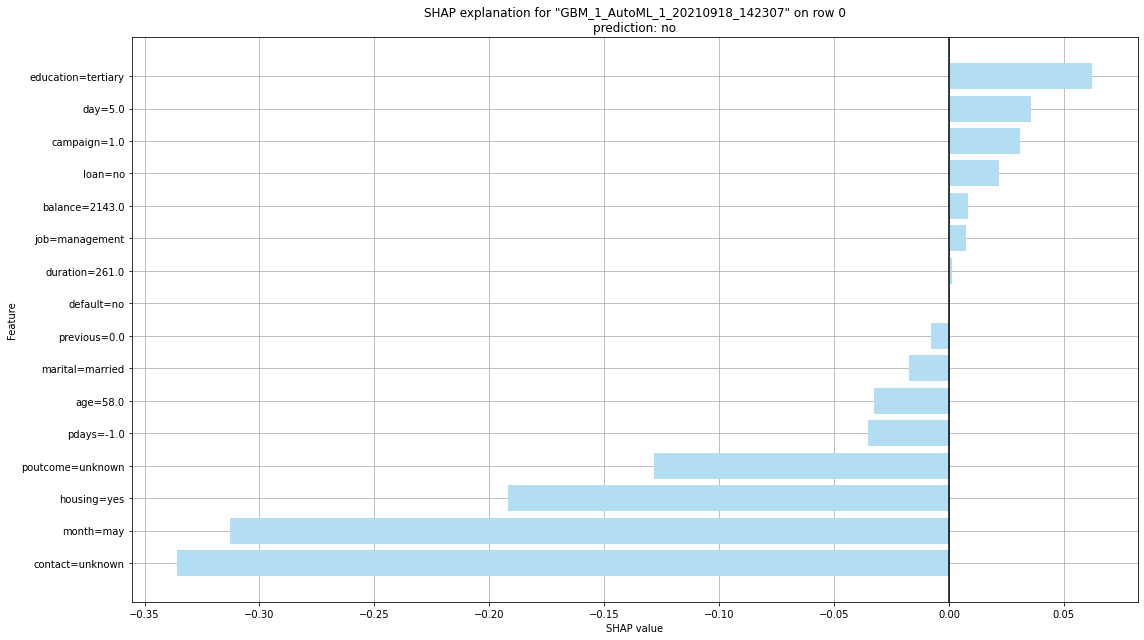

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,no,yes
StackedEnsemble_BestOfFamily_1_AutoML_1_20210918_142307,0.930721,0.205519,0.607321,0.166186,0.253131,0.0640754,5074,0.020819,StackedEnsemble,no,0.992169,0.00783091
GBM_1_AutoML_1_20210918_142307,0.928977,0.217237,0.601878,0.176573,0.256299,0.065689,4816,0.016219,GBM,no,0.968664,0.0313357
XGBoost_1_AutoML_1_20210918_142307,0.925019,0.213775,0.591697,0.184341,0.256616,0.0658515,5310,0.004558,XGBoost,no,0.992918,0.00708192
GLM_1_AutoML_1_20210918_142307,0.905742,0.241351,0.549864,0.205816,0.267893,0.0717669,14578,0.002359,GLM,no,0.98461,0.0153904
XGBoost_2_AutoML_1_20210918_142307,0.879749,0.509789,0.521161,0.218524,0.400554,0.160444,522,0.00155,XGBoost,no,0.641452,0.358548


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

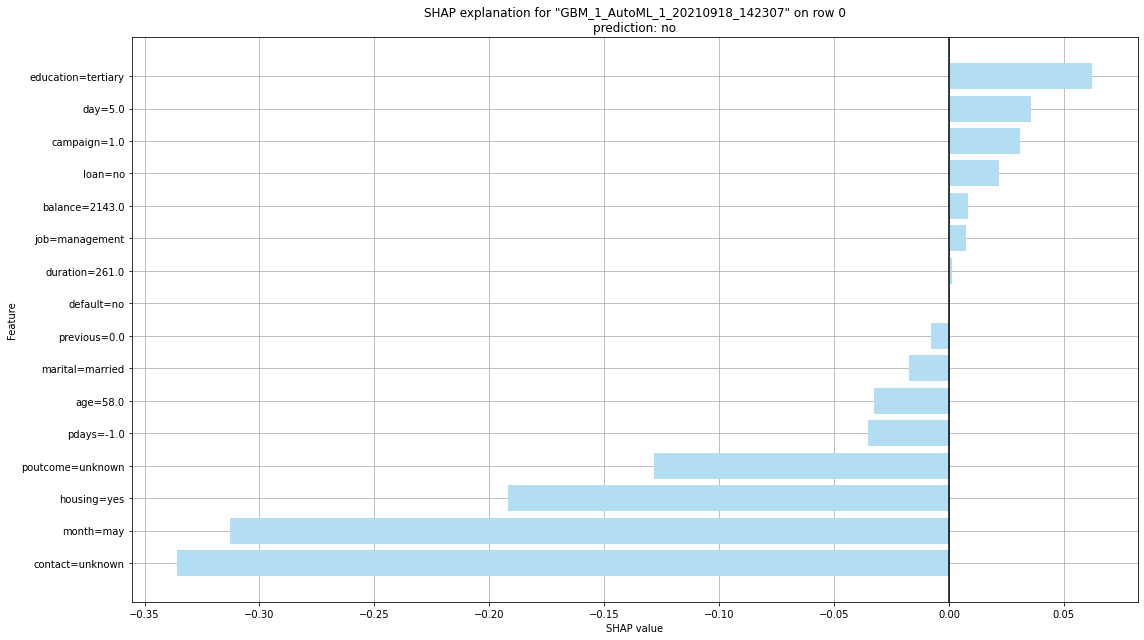

In [14]:
# Descripcion de la prediccion de un ejemplo
aml.explain_row(test, row_index=0)

# Referencias
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#required-parameters